In [107]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Making a custom neural network, with a single hidden layer.


1. Define the neural network structure ( # of input units,  # of hidden units, etc).
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)

In [108]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)

In [109]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [110]:
X = X.T
y = y.reshape(1, -1)  # Reshape y to (1, m)

# Define neural network structure
def layer_sizes(X, y):
    n_x = X.shape[0]  # Number of features
    n_h = 5  # Hidden layer neurons
    n_y = 1  # Binary classification output
    return (n_x, n_h, n_y)

# Initialize parameters
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(42)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

# Forward propagation
def forward_propagation(X, params):
    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

# Compute loss
def compute_loss(A2, Y):
    m = Y.shape[1]
    loss = -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    return np.squeeze(loss)

# Backpropagation
def backpropagation(params, prop_calc, X, Y):
    m = Y.shape[1]
    W2 = params["W2"]
    A1, A2 = prop_calc["A1"], prop_calc["A2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

# Update parameters
def update_params(params, grads, learning_rate=0.2):
    for key in params.keys():
        params[key] -= learning_rate * grads["d" + key]
    return params

# Training the neural network
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=True):
    np.random.seed(3)
    n_x, _, n_y = layer_sizes(X, Y)
    params = initialize_parameters(n_x, n_h, n_y)
    losses = []

    for i in range(num_iterations):
        prop_calc = forward_propagation(X, params)
        loss = compute_loss(prop_calc["A2"], Y)
        losses.append(loss)
        grads = backpropagation(params, prop_calc, X, Y)
        params = update_params(params, grads)

        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {loss:.6f}")

    return params, losses

# Train the model
params, losses = nn_model(X, y, n_h=5, num_iterations=10000, print_cost=True)


Cost after iteration 0: 0.693157
Cost after iteration 1000: 0.256004
Cost after iteration 2000: 0.254373
Cost after iteration 3000: 0.253341
Cost after iteration 4000: 0.252139
Cost after iteration 5000: 0.249882
Cost after iteration 6000: 0.080539
Cost after iteration 7000: 0.025338
Cost after iteration 8000: 0.015133
Cost after iteration 9000: 0.011070


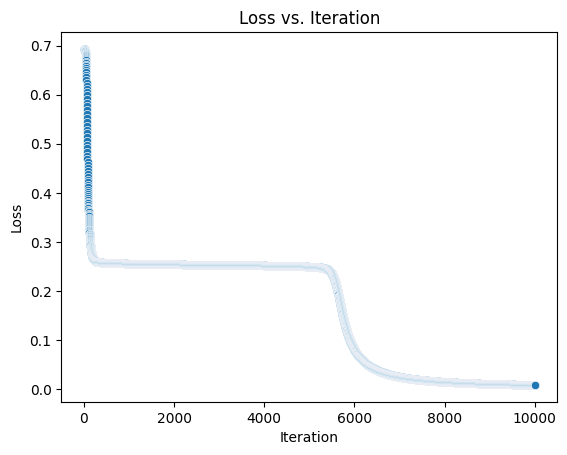

In [115]:
sns.scatterplot(x = np.arange(len(losses)), y = losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs. Iteration")
plt.show()

In [116]:
from sklearn.metrics import accuracy_score
# Make predictions
def predict(X, params):
    prop_calc = forward_propagation(X, params)
    predictions = (prop_calc["A2"] > 0.5).astype(int)
    return predictions

In [117]:
predictions = predict(X, params)
accuracy = accuracy_score(y.flatten(), predictions.flatten())
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.90%


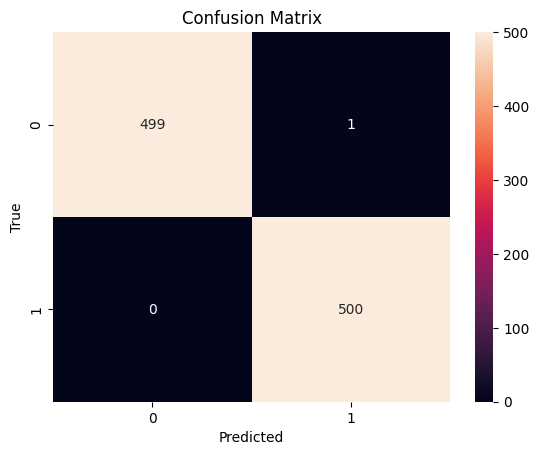

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y.flatten(), predictions.flatten())
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show();